In [1]:
#%pip install imageio == 2.4.1
#%pip install gym
#%pip install pygame
#%pip install opencv-python
#%pip install matplotlib

In [3]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.rollout_agent import RolloutAgent
from source.utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test_model passed!


Rollout is VERY expensive! 

step: 100, epsilon: 0.2, total reward: 0.0, avarge success rate: 0.0, avarage reward per step: 0.0
step: 200, epsilon: 0.2, total reward: 0.0, avarge success rate: 0.0, avarage reward per step: 0.0
step: 300, epsilon: 0.2, total reward: 44.0, avarge success rate: 0.43, avarage reward per step: 0.04451582647965015
step: 400, epsilon: 0.2, total reward: 107.0, avarge success rate: 0.62, avarage reward per step: 0.06486843246869986
step: 500, epsilon: 0.2, total reward: 178.0, avarge success rate: 0.71, avarage reward per step: 0.08021946069183146
step: 600, epsilon: 0.2, total reward: 252.0, avarge success rate: 0.73, avarage reward per step: 0.08830712761194044
step: 700, epsilon: 0.2, total reward: 323.0, avarge success rate: 0.71, avarage reward per step: 0.07941400955356297
step: 800, epsilon: 0.2, total reward: 387.0, avarge success rate: 0.63, avarage reward per step: 0.07742507624414932
step: 900, epsilon: 0.2, total reward: 461.0, avarge success rate: 0.73, avarage reward per ste

100%|██████████| 100/100 [00:00<00:00, 239.49it/s]


Success rate = 1.0


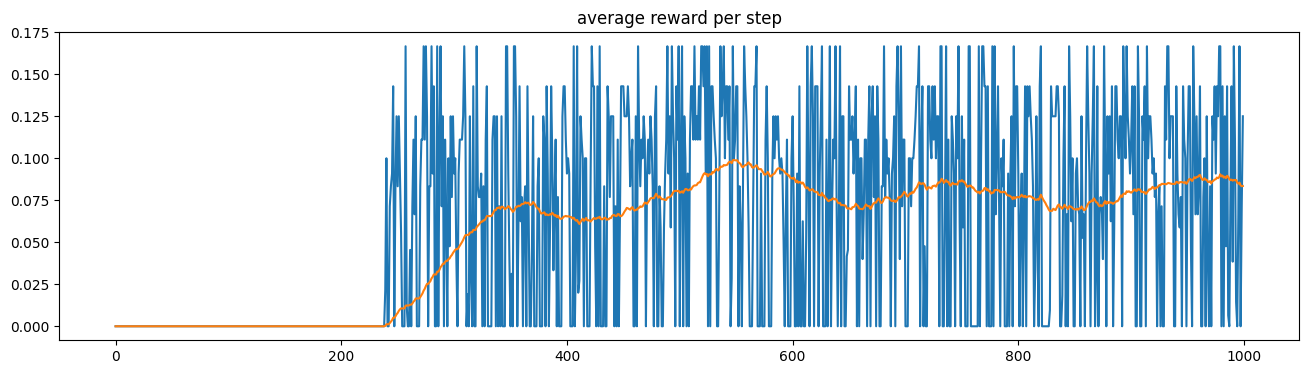

In [6]:
# Policy Eval
# Params
max_episode = 1000
video_path = os.path.join(ROOT, "video/rollout.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
report_interval = max(max_episode // 10, 1)
# set random seeds
rng = np.random.default_rng(random_seed)
np.random.seed(random_seed)
# epsilon decay
epsilon_schedule = create_decay_schedule(max_episode)
lr_schedule = create_decay_schedule(max_episode)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4",
               is_slippery=False, render_mode='rgb_array')
env.np_random = rng

# Create Agent
agent = RolloutAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.95,
    epsilon=0.2,
    learning_rate=0.1,
    agent_type='q_learning',
    planning_steps=3
)

# Start Learning
for i in range(max_episode):
    reward, steps = agent.play_episode(env)#, epsilon=epsilon_schedule[i])
    history.append(reward / steps)
    total_reward += reward
    if i % report_interval == 0 and i != 0:
        print(
            f"step: {i}, epsilon: {agent._epsilon}, total reward: {total_reward}, avarge success rate: {np.sum([x > 0 for x in history[-report_interval:-1]])/report_interval}, avarage reward per step: {np.mean(history[-report_interval:-1])}")
print(f"\nrewarding episodes: {total_reward}")
# For off policy learning only: get greedy policy (no exploration)
agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q)
agent._epsilon = 0
# Run Eval
success_rate = estimate_success_rate(agent, env, 100)
print(f"Success rate = {success_rate}")
# play last episode with video recording
#agent.play_episode(env, learning=False, video_path=video_path)

plot_history(history)
# html=render_mp4(video_path)
# HTML(html)


test_rollout_agent passed!


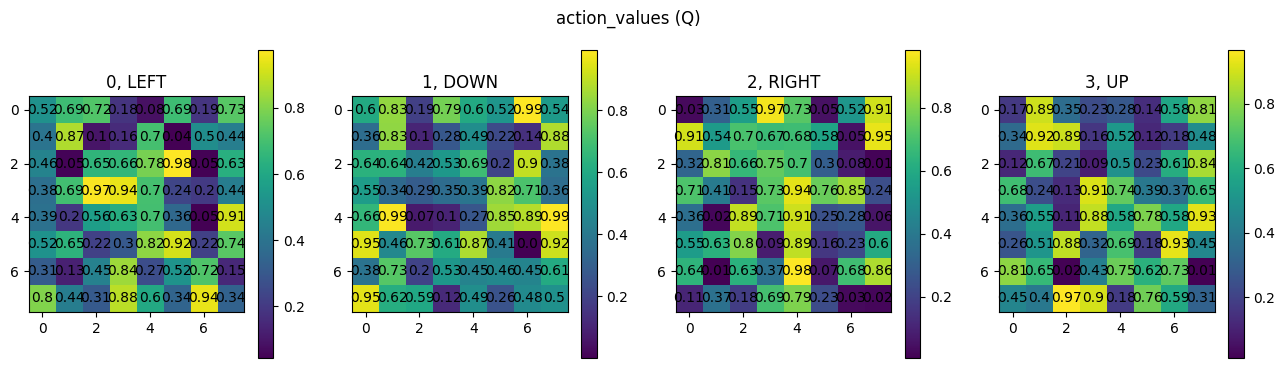

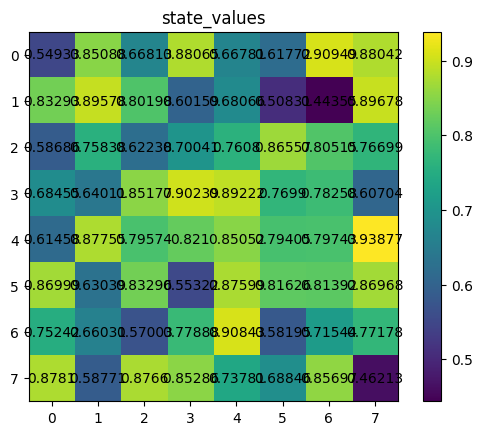

In [ ]:
show_state_action_values(agent, 'frozen_lake_8x8')